In [38]:
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm #QQ plot

# My Custom Packages
import mystats

## baseball game test T- Test
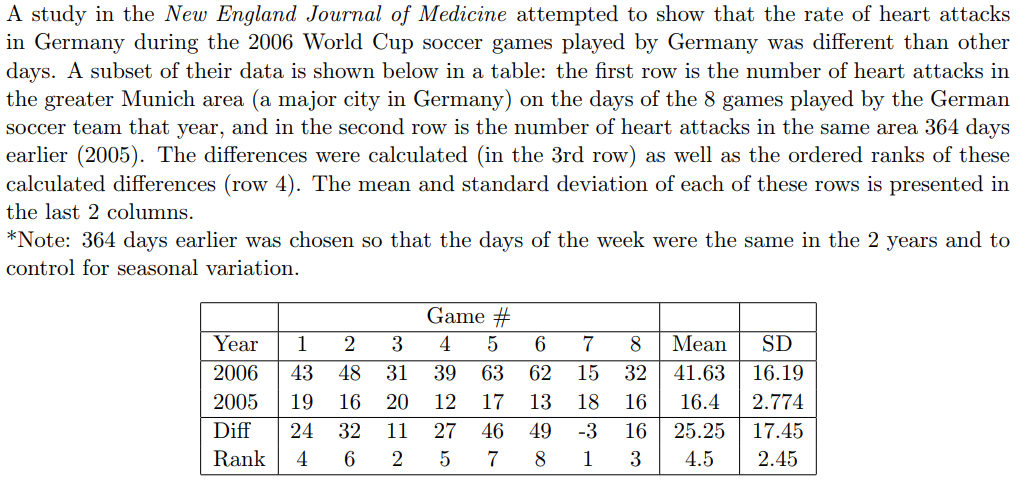

In [4]:
data1 = [43, 48, 31, 39, 63, 62, 15, 32]
data2 = [19, 16, 20, 12, 17, 13, 18, 16]

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


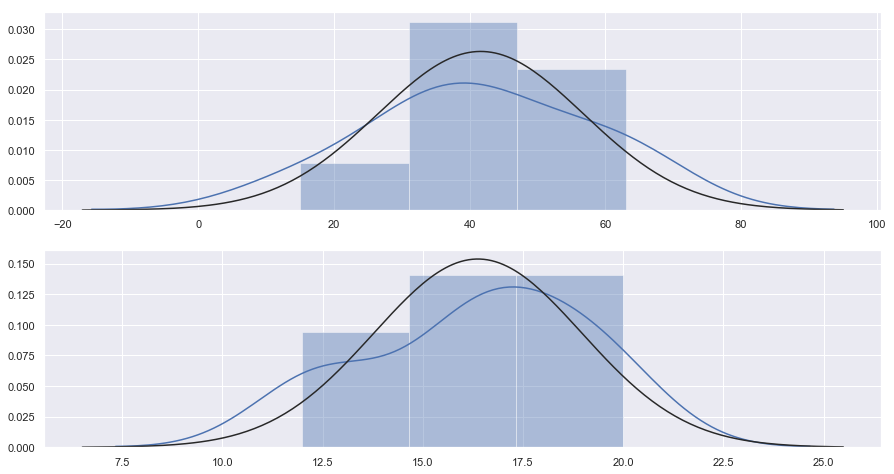

In [5]:
f, (ax1, ax2) = plt.subplots(2, figsize=(15,8))
sns.distplot(data1, kde=True, fit=stats.norm, ax = ax1);
sns.distplot(data2, kde=True, fit=stats.norm, ax = ax2);

### T Test by hand (Pair)

In [6]:
data = pd.DataFrame({'data1': (43, 48, 31, 39, 63, 62, 15, 32), 
             'data2': (19, 16, 20, 12, 17, 13, 18, 16)})
data['diff'] = (data.data1 - data.data2)

### T Test by hand (2 sample)

In [8]:
from scipy import stats

# tt = (sm-m)/np.sqrt(sv/float(n))  # t-statistic for mean
tt = (41.63-16.4)/(np.sqrt(((16.19**2)/8) + ((2.774**2)/8)))
print("T Test Score: ", tt)

#Studnt, n=14, p<0.05, 2-tail
print("T Critical Value: ", stats.t.ppf(1-0.025, 14))

# p value two sided 
pval = stats.t.sf(np.abs(tt), 14)*2
print("p-value: ", pval)


T Test Score:  4.34442472393355
T Critical Value:  2.1447866879169273
p-value:  0.0006731971911374279


#### T Test via Scipy

In [9]:
stat, p = stats.ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=4.347, p=0.001
Different distribution (reject H0)


#### Wilconxon Sum

In [10]:
# compare samples
stat, p = stats.wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=1.000, p=0.017
Different distribution (reject H0)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


----


# ANOVA Problem

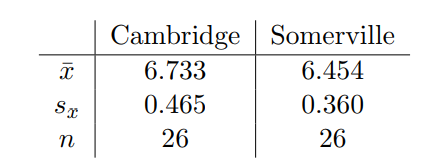
calculate a reasonable 95% confidence interval for the true mean difference

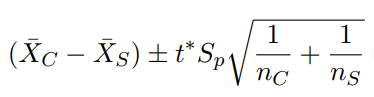

In [32]:
# Two Sample T Test With Confidence Interval
from scipy import stats

mu_1 = 6.733
s_1 = 0.465
n_1 = 26

mu_2 = 6.454
s_2 = 0.360 
n_2 = 26

df_ = n_1 + n_2 - 2

alpha = 0.05

# tt = (sm-m)/np.sqrt(sv/float(n))  # t-statistic for mean
tt = (mu_1 - mu_2) / (np.sqrt(((s_1**2)/n_1) + ((s_2**2)/n_2)))
print("T Test Score: ", tt)

#Studnt, n=14, p<0.05, 2-tail
t_crit = stats.t.ppf(1-alpha/2, df_)
print("T Critical Value: ", t_crit)

# p value two sided 
pval = stats.t.sf(np.abs(tt), df_)*2
print("p-value: ", pval)

# confidence interval
    ## Pooled Standard Deviaiton
sp = np.sqrt((((n_1-1)*(s_1**2)) + ((n_2-1)*(s_2**2)))/df_) # pooled variance (ratio of variances is less than 1)
se = sp * np.sqrt((1/n_1 + 1/n_2))

diff_ = mu_1 - mu_2

ci_low = diff_ - (t_crit * se)
ci_high = diff_ + (t_crit * se)
print("Confidence Interval from: %.3f to %.3f" % (ci_low, ci_high))

T Test Score:  2.4191493689902672
T Critical Value:  2.008559109715206
p-value:  0.01923727887108601
Confidence Interval from: 0.047 to 0.511


Notice this interval does not contain one: we can thus say that the median housing price is significantly different in the two groups, in fact, the median price is higher in Cmabridge than it is in Somerville

## Sampling distribution of Y

Notes from [Joshua M. Tebbs](http://people.stat.sc.edu/Tebbs/stat509/s18notes.pdf)

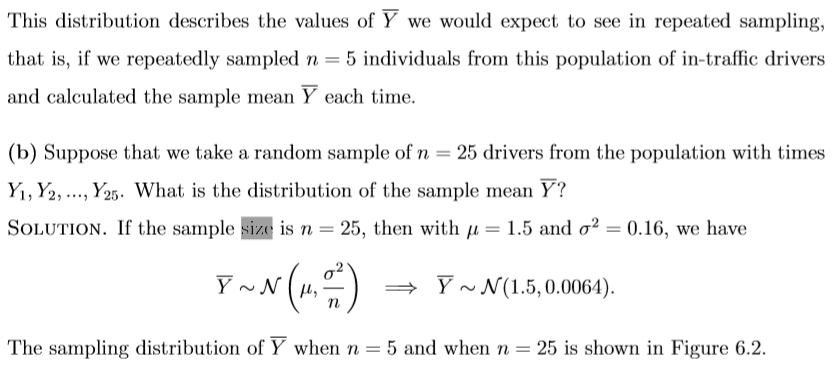

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


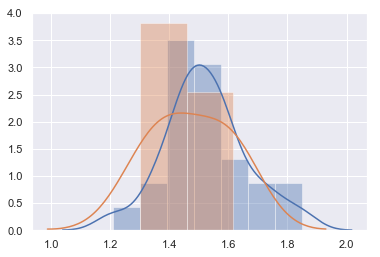

In [12]:
data1= stats.norm.rvs(loc=1.5, scale=0.16, size = 25)
data2= stats.norm.rvs(loc=1.5, scale=0.16, size = 5)

sns.distplot(data1, kde=True);
sns.distplot(data2, kde=True);

In [13]:
stats.norm.rvs(1/5, scale = (1.5**2) ,size = 50).mean()

0.02854864779955669

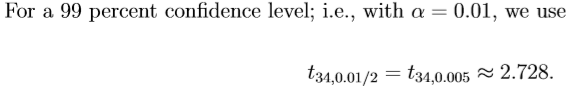

In [15]:
stats.t.ppf(0.995, 34)

2.7283943670706616

In [207]:
#stats.norm.interval(0.68, loc=mu, scale=sigma)
stats.norm.interval(alpha=0.975,loc=0, scale = 1)

(-2.241402727604945, 2.241402727604947)

In [169]:
import scipy.stats
scipy.stats.norm(loc=100, scale=12)
#where loc is the mean and scale is the std dev
#if you wish to pull out a random number from your distribution
scipy.stats.norm.rvs(loc=100, scale=12)

#To find the probability that the variable has a value LESS than or equal
#let's say 113, you'd use CDF cumulative Density Function
scipy.stats.norm.cdf(113,100,12)
Output: 0.86066975255037792
#or 86.07% probability

#To find the probability that the variable has a value GREATER than or
#equal to let's say 125, you'd use SF Survival Function 
scipy.stats.norm.sf(125,100,12)
Output: 0.018610425189886332
#or 1.86%

#To find the variate for which the probability is given, let's say the 
#value which needed to provide a 98% probability, you'd use the 
#PPF Percent Point Function
scipy.stats.norm.ppf(.98,100,12)

In [41]:
def my_ttest(mu_1, s_1, n_1, mu_2, s_2, n_2, alpha=0.05):
    # Two Sample T Test
    from scipy import stats

    # General Stats

    ## Sample Data 1
    data1 = stats.t.rvs(loc=mu_1, scale=s_1, df=(n_1-1), size=n_1)

    ## Sample Data 2
    data2 = stats.t.rvs(loc=mu_1, scale=s_1, df=(n_1-1), size=n_1)


    df_ = n_1 + n_2 - 2
    alpha = alpha

    # plot distribution for normality
    mystats.descriptive_statistics_plots(data1)
    mystats.descriptive_statistics_plots(data2)


    # tt = (sm-m)/np.sqrt(sv/float(n))  # t-statistic for mean
    tt = (mu_1 - mu_2) / (np.sqrt(((s_1**2)/n_1) + ((s_2**2)/n_2)))
    print("T Test Score: ", tt)

    #Studnt, n=14, p<0.05, 2-tail
    t_crit = stats.t.ppf(1-alpha/2, df_)
    print("T Critical Value: ", t_crit)

    # p value two sided 
    pval = stats.t.sf(np.abs(tt), df_)*2
    print("p-value: ", pval)

    # confidence interval
        ## Pooled Standard Deviaiton
    sp = np.sqrt((((n_1-1)*(s_1**2)) + ((n_2-1)*(s_2**2)))/df_ ) # pooled variance (ratio of variances is less than 1)
    se = sp * np.sqrt((1/n_1 + 1/n_2))

    diff_ = mu_1 - mu_2

    ci_low = diff_ - (t_crit * se)
    ci_high = diff_ + (t_crit * se)
    print("Confidence Interval from: %.3f to %.3f" % (ci_low, ci_high))

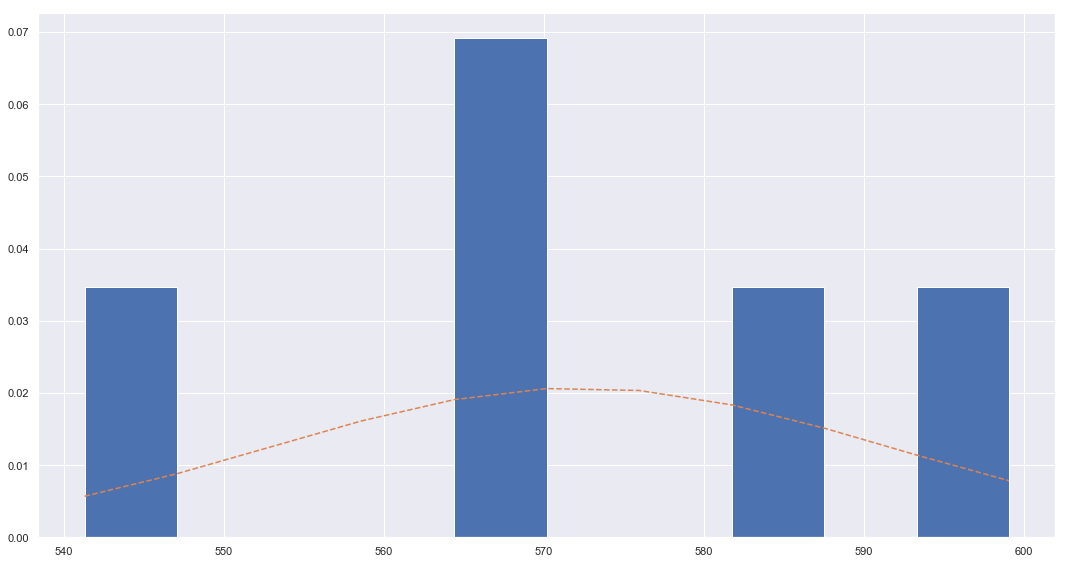

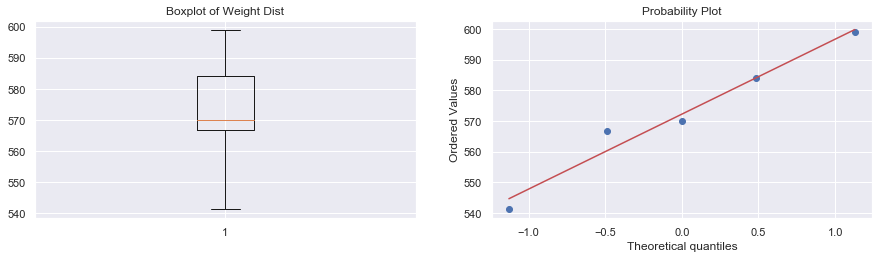

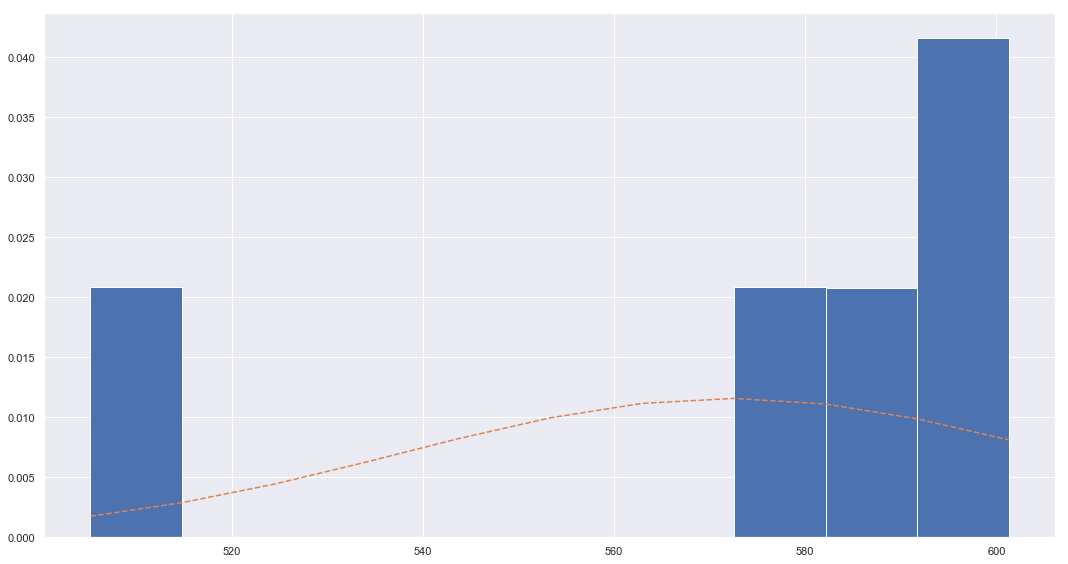

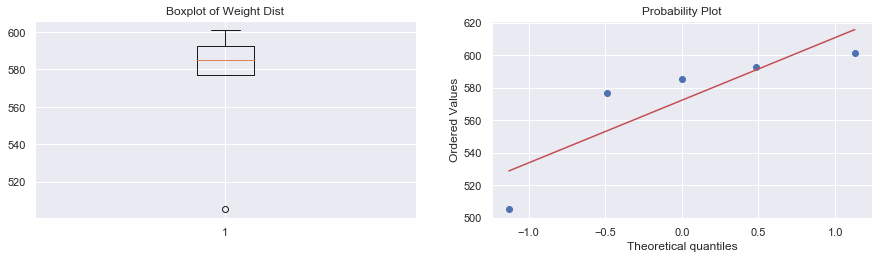

T Test Score:  5.3531678462398915
T Critical Value:  2.3060041350333704
p-value:  0.0006832477617618652
Confidence Interval from: 47.246 to 118.754


In [44]:
## Sample Data 1
mu_1 = 595
s_1 = 29
n_1 = 5

## Sample Data 2
mu_2 = 512
s_2 = 19 
n_2 = 5

my_ttest(mu_1, s_1, n_1, mu_2, s_2, n_2, alpha=0.05)

In [ ]:
# Two Sample T Test
    from scipy import stats

    # General Stats

    ## Sample Data 1
    mu_1 = 595
    s_1 = 29
    n_1 = 5
    data1 = stats.t.rvs(loc=mu_1, scale=s_1, df=(n_1-1), size=n_1)

    ## Sample Data 2
    mu_2 = 512
    s_2 = 19 
    n_2 = 5
    data2 = stats.t.rvs(loc=mu_1, scale=s_1, df=(n_1-1), size=n_1)


    df_ = n_1 + n_2 - 2
    alpha = alpha

    # plot distribution for normality
    #f, (ax1, ax2) = plt.subplots(2, figsize=(15,8))
    #sns.distplot(data1, kde=True, fit=stats.norm, ax = ax1);
    #sns.distplot(data2, kde=True, fit=stats.norm, ax = ax2);
    mystats.descriptive_statistics_plots(data1)
    mystats.descriptive_statistics_plots(data2)


    # tt = (sm-m)/np.sqrt(sv/float(n))  # t-statistic for mean
    tt = (mu_1 - mu_2) / (np.sqrt(((s_1**2)/n_1) + ((s_2**2)/n_2)))
    print("T Test Score: ", tt)

    #Studnt, n=14, p<0.05, 2-tail
    t_crit = stats.t.ppf(1-alpha/2, df_)
    print("T Critical Value: ", t_crit)

    # p value two sided 
    pval = stats.t.sf(np.abs(tt), df_)*2
    print("p-value: ", pval)

    # confidence interval
        ## Pooled Standard Deviaiton
    sp = np.sqrt((((n_1-1)*(s_1**2)) + ((n_2-1)*(s_2**2)))/df_ ) # pooled variance (ratio of variances is less than 1)
    se = sp * np.sqrt((1/n_1 + 1/n_2))

    diff_ = mu_1 - mu_2

    ci_low = diff_ - (t_crit * se)
    ci_high = diff_ + (t_crit * se)
    print("Confidence Interval from: %.3f to %.3f" % (ci_low, ci_high))

__Assumptions__
- __Independence:__ Sample are randomly and independley chosen
- __Normality:__ x1 and x2 are normally distributed
- __Equality of Variance:__ sigma1 does not equal sigma2

95% confidence level to preduct differece in data 1 is different from 550?

In [57]:
t_crit = stats.t.ppf(1-0.05/2, 4)
dif_ = 595

se = 29 * np.sqrt(1+(1/5))

ci_low = dif_ - (tc * se) 
ci_high = dif_ + (tc * se)
print("T Critical Value: ", t_crit)
print("Confidence Interval from: %.3f to %.3f" % (ci_low, ci_high))

T Critical Value:  2.7764451051977987
Confidence Interval from: 506.798 to 683.202
